In [1]:
#This fild is used to process these data
import pandas as pd
import math
from tqdm import tqdm
import numpy as np
from pandas import set_option
import matplotlib.pyplot as plt

#First of all, import these data for processing
col_name_Part_B = ['Rndrng_NPI', 'Rndrng_Prvdr_Gndr', 'Rndrng_Prvdr_Type','Rndrng_Prvdr_State_FIPS', 'Tot_HCPCS_Cds','Tot_Benes_PartB', 'Tot_Srvcs', 'Tot_Sbmtd_Chrg', 'Tot_Mdcr_Pymt_Amt', 'Bene_Avg_Risk_Scre']
col_name_Part_D = ['Prscrbr_NPI', 'Prscrbr_Gndr','Prscrbr_Type', 'Prscrbr_State_FIPS','Tot_Clms', 'Tot_30day_Fills', 'Tot_Day_Suply', 'Tot_Drug_Cst', 'Tot_Benes_PartD']
col_name_DMEPOS = ['Rfrg_NPI', 'Rfrg_Prvdr_Gnder', 'Rfrg_Prvdr_Type', 'Rfrg_Prvdr_State_FIPS','Tot_Suplrs', 'Tot_Suplr_HCPCS_Cds','Tot_Suplr_Benes', 'Tot_Suplr_Clms', 'Tot_Suplr_Srvcs', 'Suplr_Sbmtd_Chrgs', 'Suplr_Mdcr_Pymt_Amt']

In [2]:
#log the 2019 part B data
data_Part_B_2019 = pd.read_csv('Part_B_used\Medicare_Physician_Other_Practitioners_by_Provider_2019.csv', sep=',', header =None, names = col_name_Part_B)
data_Part_B_df_2019 = pd.DataFrame(data_Part_B_2019).iloc[1:].reset_index(drop=True)
data_Part_B_df_2019

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,3,4,5,6,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Rndrng_NPI,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Type,Rndrng_Prvdr_State_FIPS,Tot_HCPCS_Cds,Tot_Benes_PartB,Tot_Srvcs,Tot_Sbmtd_Chrg,Tot_Mdcr_Pymt_Amt,Bene_Avg_Risk_Scre
0,1003000126,M,Internal Medicine,24,18,610,1392,519136,124877.67,2.5917
1,1003000134,M,Pathology,17,20,3614,7835,1213264,228078.56,1.1246
2,1003000142,M,Anesthesiology,39,54,264,2530,215156,83582.18,1.6146
3,1003000423,F,Obstetrics & Gynecology,39,24,74,897,23150,9007.31,0.9065
4,1003000480,M,General Surgery,08,30,104,159,210964.25,31113.49,1.7191
...,...,...,...,...,...,...,...,...,...,...
1155865,1992999569,F,Optometry,6.0,8,16,31.0,3758.37,1847.75,0.9686
1155866,1992999759,M,Nurse Practitioner,13.0,29,35,315.0,22182.0,5214.41,1.0969
1155867,1992999775,NaN,Ambulatory Surgical Center,41.0,17,164,254.0,1183550.0,369738.48,1.0471
1155868,1992999825,M,Otolaryngology,53.0,40,535,1034.0,353990.5,100732.73,1.1207


In [3]:
#log the 2018 part B data
data_Part_B_2018 = pd.read_csv('Part_B_used\Medicare_Physician_Other_Practitioners_by_Provider_2018.csv', sep=',', header =None, names = col_name_Part_B)
data_Part_B_df_2018 = pd.DataFrame(data_Part_B_2018).iloc[1:].reset_index(drop=True)
data_Part_B_df_2018

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,3,4,5,6,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Rndrng_NPI,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Type,Rndrng_Prvdr_State_FIPS,Tot_HCPCS_Cds,Tot_Benes_PartB,Tot_Srvcs,Tot_Sbmtd_Chrg,Tot_Mdcr_Pymt_Amt,Bene_Avg_Risk_Scre
0,1003000126,M,Internal Medicine,24,19,445,1218,692640,102505.73,2.2948
1,1003000134,M,Pathology,17,21,3322,7329,1143597,214070.99,1.0899
2,1003000142,M,Anesthesiology,39,51,266,2269,261064,97503.3,1.7085
3,1003000407,M,Family Practice,42,23,160,476,91196,37485.18,2.1838
4,1003000423,F,Obstetrics & Gynecology,39,20,73,283,16773,6856.7,1.0221
...,...,...,...,...,...,...,...,...,...,...
1121457,1992999551,F,Internal Medicine,6.0,50,334,1111.0,181414.4,65362.61,1.3348
1121458,1992999569,F,Optometry,6.0,10,47,107.0,12455.86,6455.48,0.9473
1121459,1992999759,M,Nurse Practitioner,13.0,30,77,301.0,35394.72,6144.87,1.106
1121460,1992999775,NaN,Ambulatory Surgical Center,41.0,15,150,245.0,882600.0,230479.73,0.9081


In [4]:
#log the 2017 part B data
data_Part_B_2017 = pd.read_csv('Part_B_used\Medicare_Physician_Other_Practitioners_by_Provider_2017.csv', sep=',', header =None, names = col_name_Part_B)
data_Part_B_df_2017 = pd.DataFrame(data_Part_B_2017).iloc[1:].reset_index(drop=True)
data_Part_B_df_2017

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,3,4,5,6,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Rndrng_NPI,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Type,Rndrng_Prvdr_State_FIPS,Tot_HCPCS_Cds,Tot_Benes_PartB,Tot_Srvcs,Tot_Sbmtd_Chrg,Tot_Mdcr_Pymt_Amt,Bene_Avg_Risk_Scre
0,1003000126,M,Internal Medicine,24,23,578,1670,800850,137084.55,2.1178
1,1003000134,M,Pathology,17,20,3703,8149,1272161,243698.97,1.1024
2,1003000142,M,Anesthesiology,39,60,278,3085,288873,119726.66,1.6807
3,1003000407,M,Family Practice,42,29,260,857,132744,66084.78,2.1173
4,1003000423,F,Obstetrics & Gynecology,39,29,71,155,33700,11244.68,1.0032
...,...,...,...,...,...,...,...,...,...,...
1088682,1992999569,F,Optometry,6.0,9,20,48.0,5046.38,2310.89,1.163
1088683,1992999759,M,Nurse Practitioner,13.0,28,238,412.0,72488.33,18359.05,1.1094
1088684,1992999775,NaN,Ambulatory Surgical Center,41.0,29,170,289.0,909250.0,238888.99,0.8965
1088685,1992999825,M,Otolaryngology,53.0,54,544,1084.0,434015.5,107330.75,1.1886


In [5]:
#log the 2019 part D data
data_Part_D_2019 = pd.read_csv('Part_D_used\Medicare_Part_D_Prescribers_by_Provider_2019.csv', sep=',', header =None, names = col_name_Part_D)
data_Part_D_df_2019 = pd.DataFrame(data_Part_D_2019).iloc[1:].reset_index(drop=True)

#delate some remarks in the Tot_Drug_Cst column
data_Part_D_df_2019.replace('$','',regex=False)
data_Part_D_df_2019

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Prscrbr_NPI,Prscrbr_Gndr,Prscrbr_Type,Prscrbr_State_FIPS,Tot_Clms,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes_PartD
0,1003000126,M,Internal Medicine,24,589,681.73333333,15955,28902.12,214
1,1003000142,M,Anesthesiology,39,1092,1156.1666667,31971,61987.88,282
2,1003000167,M,Dentist,32,73,73,530,370.56,52
3,1003000175,F,Dentist,06,21,21,162,176.64,11
4,1003000282,F,Nurse Practitioner,47,63,91,2693,2221.14,NaN
...,...,...,...,...,...,...,...,...,...
1240590,1992999759,M,Nurse Practitioner,13.0,671,1153.866667,32068,77374.92,89.0
1240591,1992999817,M,Orthopedic Surgery,6.0,24,24.0,288,239.87,15.0
1240592,1992999825,M,Otolaryngology,53.0,255,285.033333,5145,9612.37,134.0
1240593,1992999833,M,Psychoanalyst,36.0,24,24.0,720,19427.01,NaN


In [4]:
#Transform the type of 2019 Part D dataset
special_list_2 = {2,3,4,5,6}
for j in range(7):
    if j in special_list_2:
        data_Part_D_df_2019[col_name_Part_D[j]] = data_Part_D_df_2019[col_name_Part_D[j]].astype('double')

In [19]:
#Replace NaNs in the 2019 Part D dataset with the median
data_Part_D_df_2019.fillna(data_Part_D_df_2019.median(), inplace = True)
data_Part_D_df_2019


,Prscrbr_NPI,Prscrbr_Type,Tot_Clms,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes_PartD
0,1003000126,Internal Medicine,13.0,13.0,360.0,150.76,20.0
1,1003000126,Internal Medicine,22.0,26.0,780.0,92.81,12.0
2,1003000126,Internal Medicine,41.0,50.0,1482.0,373.60,22.0
3,1003000126,Internal Medicine,15.0,15.0,77.0,132.57,15.0
4,1003000126,Internal Medicine,21.0,27.0,787.0,118.53,11.0
...,...,...,...,...,...,...,...
25401865,1992999874,Internal Medicine,19.0,26.0,723.0,297.63,13.0
25401866,1992999874,Internal Medicine,11.0,11.0,330.0,433.17,20.0
25401867,1992999874,Internal Medicine,15.0,17.0,470.0,182.25,20.0
25401868,1992999874,Internal Medicine,16.0,20.0,584.0,101.19,13.0


In [20]:
#this part is used to save the new dataset without nan
data_Part_D_df_2019.to_csv('Part_D_2019_without_nan.csv', index = False)

In [6]:
#log the 2018 part D data
data_Part_D_2018 = pd.read_csv('Part_D_used\Medicare_Part_D_Prescribers_by_Provider_2018.csv', sep=',', header =None, names = col_name_Part_D)
data_Part_D_df_2018 = pd.DataFrame(data_Part_D_2018).iloc[1:].reset_index(drop=True)
#delate some remarks in the Tot_Drug_Cst column
data_Part_D_df_2018.replace('$','',regex=False)
data_Part_D_df_2018

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Prscrbr_NPI,Prscrbr_Gndr,Prscrbr_Type,Prscrbr_State_FIPS,Tot_Clms,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes_PartD
0,1003000126,M,Internal Medicine,24,492,509.2,11371,27744.26,164
1,1003000142,M,Anesthesiology,39,1818,1910.3333333,54255,124220.94,325
2,1003000167,M,Dentist,32,77,77,693,502.88,45
3,1003000282,F,Nurse Practitioner,47,100,152,4482,5132.53,NaN
4,1003000407,M,Family Practice,42,2766,2786.2,41540,118165.29,114
...,...,...,...,...,...,...,...,...,...
1204930,1992999759,M,Nurse Practitioner,13.0,483,750.4,20285,137725.97,106.0
1204931,1992999791,F,Registered Nurse,47.0,19,27.0,722,1954.6,11.0
1204932,1992999817,M,Orthopedic Surgery,6.0,35,35.2,285,419.1,21.0
1204933,1992999825,M,Otolaryngology,53.0,221,243.533333,4375,7186.07,103.0


In [22]:
#Transform the type of 2018 Part D dataset
special_list_2 = {2,3,4,5,6}
for j in range(7):
    if j in special_list_2:
        data_Part_D_df_2018[col_name_Part_D[j]] = data_Part_D_df_2018[col_name_Part_D[j]].astype('double')

In [23]:
#Replace NaNs in the 2018 Part D dataset with the median
data_Part_D_df_2018.fillna(data_Part_D_df_2018.median(), inplace = True)
data_Part_D_df_2018

,Prscrbr_NPI,Prscrbr_Type,Tot_Clms,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes_PartD
0,1003000126,Internal Medicine,13.0,13.0,390.0,85.83,20.0
1,1003000126,Internal Medicine,11.0,11.0,64.0,123.11,11.0
2,1003000126,Internal Medicine,12.0,15.0,450.0,39.02,20.0
3,1003000126,Internal Medicine,12.0,12.0,71.0,178.66,12.0
4,1003000126,Internal Medicine,13.0,13.0,77.0,194.56,12.0
...,...,...,...,...,...,...,...
25311595,1992999825,Otolaryngology,43.0,48.6,1196.0,1766.22,20.0
25311596,1992999825,Otolaryngology,11.0,13.0,207.0,323.36,20.0
25311597,1992999825,Otolaryngology,11.0,11.0,98.0,614.40,11.0
25311598,1992999825,Otolaryngology,19.0,19.0,70.0,170.91,19.0


In [24]:
#this part is used to save the new dataset without nan
data_Part_D_df_2018.to_csv('Part_D_2018_without_nan.csv', index = False)

In [7]:
#log the 2017 part D data
data_Part_D_2017 = pd.read_csv('Part_D_used\Medicare_Part_D_Prescribers_by_Provider_2017.csv', sep=',', header =None, names = col_name_Part_D)
data_Part_D_df_2017 = pd.DataFrame(data_Part_D_2017).iloc[1:].reset_index(drop=True)

#Replace all commas in numeric data with Spaces
data_Part_D_df_2017['Tot_Clms'] = data_Part_D_df_2017['Tot_Clms'].str.replace(',','').astype(float)
data_Part_D_df_2017['Tot_30day_Fills'] = data_Part_D_df_2017['Tot_30day_Fills'].str.replace(',','').astype(float)
data_Part_D_df_2017['Tot_Day_Suply'] = data_Part_D_df_2017['Tot_Day_Suply'].str.replace(',','').astype(float)
data_Part_D_df_2017['Tot_Drug_Cst'] = data_Part_D_df_2017['Tot_Drug_Cst'].str.replace('$','',regex=False)
data_Part_D_df_2017['Tot_Drug_Cst'] = data_Part_D_df_2017['Tot_Drug_Cst'].str.replace(',','').astype(float)
data_Part_D_df_2017['Tot_Benes_PartD'] = data_Part_D_df_2017['Tot_Benes_PartD'].str.replace(',','').astype(float)
data_Part_D_df_2017

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Prscrbr_NPI,Prscrbr_Gndr,Prscrbr_Type,Prscrbr_State_FIPS,Tot_Clms,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes_PartD
0,1003000126,M,Internal Medicine,24,677.0,696.0,14788.0,32639.57,234.0
1,1003000142,M,Anesthesiology,39,1946.0,2055.0,58605.0,140189.01,276.0
2,1003000167,M,Dentist,32,55.0,55.0,430.0,302.01,33.0
3,1003000175,F,Dentist,6,18.0,18.0,150.0,113.81,NaN
4,1003000282,F,Nurse Practitioner,47,90.0,110.0,2681.0,7561.21,11.0
...,...,...,...,...,...,...,...,...,...
1162893,1992999825,M,Otolaryngology,53.0,270.0,303.0,5566.0,7472.80,144.0
1162894,1992999833,M,Psychoanalyst,36.0,59.0,63.0,1866.0,4538.16,NaN
1162895,1992999866,F,Dentist,12.0,15.0,15.0,288.0,293.80,NaN
1162896,1992999874,F,Internal Medicine,51.0,81.0,89.0,1879.0,3313.95,38.0


In [26]:
#Transform the type of 2017 Part D dataset
special_list_2 = {2,3,4,5,6}
for j in range(7):
    if j in special_list_2:
        data_Part_D_df_2017[col_name_Part_D[j]] = data_Part_D_df_2017[col_name_Part_D[j]].astype('double')
        
data_Part_D_df_2017.fillna(data_Part_D_df_2017.median(), inplace = True)
data_Part_D_df_2017

,Prscrbr_NPI,Prscrbr_Type,Tot_Clms,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes_PartD
0,1003000126,Internal Medicine,13.0,13.0,390.0,59.21,20.0
1,1003000126,Internal Medicine,27.0,27.0,765.0,259.48,11.0
2,1003000126,Internal Medicine,17.0,17.0,123.0,98.99,17.0
3,1003000126,Internal Medicine,12.0,12.0,95.0,120.43,11.0
4,1003000126,Internal Medicine,17.0,17.0,105.0,300.76,17.0
...,...,...,...,...,...,...,...
25209125,1992999882,Physician Assistant,13.0,13.0,335.0,103.74,20.0
25209126,1992999882,Physician Assistant,18.0,18.0,536.0,120.76,20.0
25209127,1992999882,Physician Assistant,12.0,12.0,356.0,91.96,20.0
25209128,1992999882,Physician Assistant,18.0,18.0,515.0,102.30,20.0


In [27]:
#this part is used to save the new dataset without nan
data_Part_D_df_2017.to_csv('Part_D_2017_without_nan.csv', index = False)

In [8]:
#log the 2019 DMEPOS data
data_DMEPOS_2019 = pd.read_csv('DMEPOS_used\Medicare_Durable_Medical_Equipment_Devices_Supplies_by_Referring_Provider_Data_2019.csv', sep=',', header =None, names = col_name_DMEPOS)
data_DMEPOS_df_2019 = pd.DataFrame(data_DMEPOS_2019).iloc[1:].reset_index(drop=True)
data_DMEPOS_df_2019

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,4,5,6,7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Rfrg_NPI,Rfrg_Prvdr_Gnder,Rfrg_Prvdr_Type,Rfrg_Prvdr_State_FIPS,Tot_Suplrs,Tot_Suplr_HCPCS_Cds,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Suplr_Sbmtd_Chrgs,Suplr_Mdcr_Pymt_Amt
0,1003000126,M,Internal Medicine,24,7,8,19,163,177,37643.66,10076.62
1,1003000522,M,Family Practice,12,26,34,34,114,1206,29842.66,5031.72
2,1003000530,F,Internal Medicine,42,24,50,26,104,2675,31837.89,9933.55
3,1003000597,M,Urology,40,4,7,NaN,14,2996,18329.76,5069.78
4,1003000902,F,Family Practice,21,39,52,49,258,6973,57056.42,15717.85
...,...,...,...,...,...,...,...,...,...,...,...
389305,1992998736,M,Family Practice,12,14,25,14.0,57,356,14225.17,3270.4
389306,1992999122,M,Internal Medicine,12,62,79,108.0,632,15842,202589.15,45630.23
389307,1992999270,F,Physician Assistant,12,3,5,NaN,16,331,926.79,43.26
389308,1992999551,F,Internal Medicine,6,15,30,18.0,53,572,14068.52,3461.25


In [29]:
#Transform the type of 2019 DMEPOS dataset
special_list_3 = {3,4,5,6,7,8}
for k in range(9):
    if k in special_list_3:
        data_DMEPOS_df_2019[col_name_DMEPOS[k]] = data_DMEPOS_df_2019[col_name_DMEPOS[k]].astype('double')
        
data_DMEPOS_df_2019.fillna(data_DMEPOS_df_2019.median(), inplace = True)
data_DMEPOS_df_2019

,Rfrg_NPI,Rfrg_Prvdr_Gndr,Rfrg_Prvdr_Type,Tot_Suplrs,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Avg_Suplr_Sbmtd_Chrgs,Avg_Suplr_Mdcr_Pymt_Amt
0,1003000126,M,Internal Medicine,5.0,19.0,69.0,69.0,52.207536,17.732029
1,1003000126,M,Internal Medicine,5.0,12.0,88.0,88.0,362.305227,94.287500
2,1003000522,M,Family Practice,15.0,22.0,55.0,132.0,61.314242,5.757803
3,1003000522,M,Family Practice,2.0,19.0,13.0,13.0,14.158462,2.686923
4,1003000522,M,Family Practice,8.0,13.0,22.0,30.0,13.608667,0.979333
...,...,...,...,...,...,...,...,...,...
1656444,1992999759,M,Nurse Practitioner,50.0,375.0,411.0,648.0,554.559444,359.713009
1656445,1992999759,M,Nurse Practitioner,59.0,707.0,841.0,1239.0,136.256909,80.308676
1656446,1992999759,M,Nurse Practitioner,37.0,275.0,298.0,473.0,65.156237,39.423488
1656447,1992999759,M,Nurse Practitioner,49.0,321.0,330.0,433.0,566.409838,362.057691


In [30]:
#this part is used to save the new dataset without nan
data_DMEPOS_df_2019.to_csv('DMEPOS_2019_without_nan.csv', index = False)

In [9]:
#log the 2018 DMEPOS data
data_DMEPOS_2018 = pd.read_csv('DMEPOS_used\Medicare_Durable_Medical_Equipment_Devices_Supplies_by_Referring_Provider_Data_2018.csv', sep=',', header =None, names = col_name_DMEPOS)
data_DMEPOS_df_2018 = pd.DataFrame(data_DMEPOS_2018).iloc[1:].reset_index(drop=True)
data_DMEPOS_df_2018

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,4,5,6,7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Rfrg_NPI,Rfrg_Prvdr_Gnder,Rfrg_Prvdr_Type,Rfrg_Prvdr_State_FIPS,Tot_Suplrs,Tot_Suplr_HCPCS_Cds,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Suplr_Sbmtd_Chrgs,Suplr_Mdcr_Pymt_Amt
0,1003000126,M,Internal Medicine,24,7,14,31,286,331,84279.95,23676.5
1,1003000407,M,Family Practice,42,9,17,12,45,2691,27487.05,3592.28
2,1003000480,M,General Surgery,8,3,3,NaN,21,21,7608.75,647.88
3,1003000522,M,Family Practice,12,31,33,41,157,1675,38359.4,11042.02
4,1003000530,F,Internal Medicine,42,23,53,28,112,3576,34108.06,11949.76
...,...,...,...,...,...,...,...,...,...,...,...
386034,1992998736,M,Family Practice,12,14,21,12.0,38,139,10540.64,2828.07
386035,1992999122,M,Internal Medicine,12,70,79,115.0,565,13089,142784.4,35013.8
386036,1992999270,F,Physician Assistant,12,5,7,NaN,16,335,1082.06,149.66
386037,1992999551,F,Internal Medicine,6,13,28,16.0,72,608,13805.37,3176.26


In [32]:
#Transform the type of 2018 DMEPOS dataset
special_list_3 = {3,4,5,6,7,8}
for k in range(9):
    if k in special_list_3:
        data_DMEPOS_df_2018[col_name_DMEPOS[k]] = data_DMEPOS_df_2018[col_name_DMEPOS[k]].astype('double')
        
data_DMEPOS_df_2018.fillna(data_DMEPOS_df_2018.median(), inplace = True)
data_DMEPOS_df_2018

,Rfrg_NPI,Rfrg_Prvdr_Gndr,Rfrg_Prvdr_Type,Tot_Suplrs,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Avg_Suplr_Sbmtd_Chrgs,Avg_Suplr_Mdcr_Pymt_Amt
0,1003000126,M,Internal Medicine,4.0,21.0,134.0,135.0,53.149704,17.577333
1,1003000126,M,Internal Medicine,1.0,19.0,11.0,11.0,20.290000,6.194545
2,1003000126,M,Internal Medicine,4.0,22.0,156.0,156.0,370.894679,79.738526
3,1003000407,M,Family Practice,2.0,19.0,14.0,14.0,225.714286,70.255000
4,1003000480,M,General Surgery,1.0,19.0,11.0,11.0,43.530000,5.792727
...,...,...,...,...,...,...,...,...,...
1656175,1992999759,M,Nurse Practitioner,49.0,349.0,352.0,606.0,530.661188,356.331601
1656176,1992999759,M,Nurse Practitioner,61.0,691.0,719.0,1218.0,130.513383,82.904187
1656177,1992999759,M,Nurse Practitioner,30.0,87.0,87.0,145.0,66.856276,38.428621
1656178,1992999759,M,Nurse Practitioner,45.0,304.0,309.0,477.0,547.389853,368.695912


In [33]:
#this part is used to save the new dataset without nan
data_DMEPOS_df_2018.to_csv('DMEPOS_2018_without_nan.csv', index = False)

In [10]:
#log the 2017 DMEPOS data
data_DMEPOS_2017 = pd.read_csv('DMEPOS_used\Medicare_Durable_Medical_Equipment_Devices_Supplies_by_Referring_Provider_Data_2017.csv', sep=',', header =None, names = col_name_DMEPOS)
data_DMEPOS_df_2017 = pd.DataFrame(data_DMEPOS_2017).iloc[1:].reset_index(drop=True)
data_DMEPOS_df_2017

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Rfrg_NPI,Rfrg_Prvdr_Gnder,Rfrg_Prvdr_Type,Rfrg_Prvdr_State_FIPS,Tot_Suplrs,Tot_Suplr_HCPCS_Cds,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Suplr_Sbmtd_Chrgs,Suplr_Mdcr_Pymt_Amt
0,1003000126,M,Internal Medicine,24,11,20,32,241,280,61964.45,14900.11
1,1003000142,M,Anesthesiology,39,5,4,NaN,12,12,4137.25,2402.79
2,1003000407,M,Family Practice,42,9,15,13,39,623,8855.71,1700.5
3,1003000480,M,General Surgery,08,7,7,NaN,17,92,11801.72,1133.43
4,1003000522,M,Family Practice,12,27,39,43,127,1343,26425.11,6704.05
...,...,...,...,...,...,...,...,...,...,...,...
381438,1992999122,M,Internal Medicine,12.0,66,79,134.0,680,13482,189928.21,43254.49
381439,1992999270,F,Physician Assistant,12.0,11,14,NaN,24,3794,6019.1,1500.4
381440,1992999551,F,Internal Medicine,6.0,14,26,17.0,86,937,26142.29,5462.08
381441,1992999759,M,Nurse Practitioner,13.0,8,15,22.0,62,377,3867.31,1607.74


In [35]:
#Transform the type of 2017 DMEPOS dataset
special_list_3 = {3,4,5,6,7,8}
for k in range(9):
    if k in special_list_3:
        data_DMEPOS_df_2017[col_name_DMEPOS[k]] = data_DMEPOS_df_2017[col_name_DMEPOS[k]].astype('double')
        
data_DMEPOS_df_2017.fillna(data_DMEPOS_df_2017.median(), inplace = True)
data_DMEPOS_df_2017

,Rfrg_NPI,Rfrg_Prvdr_Gndr,Rfrg_Prvdr_Type,Tot_Suplrs,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Avg_Suplr_Sbmtd_Chrgs,Avg_Suplr_Mdcr_Pymt_Amt
0,1003000126,M,Internal Medicine,5.0,14.0,99.0,99.0,50.561818,14.438889
1,1003000126,M,Internal Medicine,6.0,18.0,115.0,115.0,355.367652,55.718087
2,1003000407,M,Family Practice,2.0,19.0,12.0,12.0,28.000000,3.900000
3,1003000480,M,General Surgery,5.0,19.0,12.0,12.0,760.480000,59.286667
4,1003000522,M,Family Practice,13.0,26.0,49.0,92.0,55.535000,6.096522
...,...,...,...,...,...,...,...,...,...
1644500,1992999551,F,Internal Medicine,1.0,19.0,23.0,23.0,200.810000,20.345652
1644501,1992999551,F,Internal Medicine,2.0,19.0,12.0,12.0,400.000000,56.500000
1644502,1992999759,M,Nurse Practitioner,3.0,19.0,41.0,42.0,28.281905,3.401429
1644503,1992999874,F,Internal Medicine,2.0,19.0,14.0,23.0,47.779565,8.101739


In [36]:
#this part is used to save the new dataset without nan
data_DMEPOS_df_2017.to_csv('DMEPOS_2017_without_nan.csv', index = False)

In [11]:
#combine part b 2017 & part b 2018
Part_B_list = [data_Part_B_df_2017, data_Part_B_df_2018]
Part_B_concat = pd.concat(Part_B_list).reset_index(drop=True)
special_list = {4,5,6,7,8,9}
for i in range(10):
    if i in special_list:
        Part_B_concat[col_name_Part_B[i]] = Part_B_concat[col_name_Part_B[i]].astype('double')

Part_B_concat


,Rndrng_NPI,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Type,Rndrng_Prvdr_State_FIPS,Tot_HCPCS_Cds,Tot_Benes_PartB,Tot_Srvcs,Tot_Sbmtd_Chrg,Tot_Mdcr_Pymt_Amt,Bene_Avg_Risk_Scre
0,1003000126,M,Internal Medicine,24,23.0,578.0,1670.0,800850.00,137084.55,2.1178
1,1003000134,M,Pathology,17,20.0,3703.0,8149.0,1272161.00,243698.97,1.1024
2,1003000142,M,Anesthesiology,39,60.0,278.0,3085.0,288873.00,119726.66,1.6807
3,1003000407,M,Family Practice,42,29.0,260.0,857.0,132744.00,66084.78,2.1173
4,1003000423,F,Obstetrics & Gynecology,39,29.0,71.0,155.0,33700.00,11244.68,1.0032
...,...,...,...,...,...,...,...,...,...,...
2210144,1992999551,F,Internal Medicine,6.0,50.0,334.0,1111.0,181414.40,65362.61,1.3348
2210145,1992999569,F,Optometry,6.0,10.0,47.0,107.0,12455.86,6455.48,0.9473
2210146,1992999759,M,Nurse Practitioner,13.0,30.0,77.0,301.0,35394.72,6144.87,1.1060
2210147,1992999775,NaN,Ambulatory Surgical Center,41.0,15.0,150.0,245.0,882600.00,230479.73,0.9081


In [12]:
#the descriptive statistics of Part B combined dataset of 2017 & 2018

set_option('precision', 3)
description_part_B = Part_B_concat.describe(include = [np.double])
description_part_B

,Tot_HCPCS_Cds,Tot_Benes_PartB,Tot_Srvcs,Tot_Sbmtd_Chrg,Tot_Mdcr_Pymt_Amt,Bene_Avg_Risk_Scre
count,2.210e+06,2.210e+06,2.210e+06,2.210e+06,2.210e+06,2.210e+06
mean,3.044e+01,3.516e+02,2.728e+03,3.538e+05,9.020e+04,1.631e+00
std,3.342e+01,2.951e+03,4.179e+04,2.603e+06,5.553e+05,8.047e-01
min,1.000e+00,1.100e+01,1.100e+01,3.350e+01,0.000e+00,3.349e-01
25%,9.000e+00,6.500e+01,1.860e+02,3.182e+04,1.044e+04,1.077e+00
50%,1.900e+01,1.670e+02,5.230e+02,1.135e+05,3.018e+04,1.407e+00
75%,4.000e+01,3.670e+02,1.522e+03,3.205e+05,8.066e+04,1.985e+00
max,1.095e+03,1.749e+06,2.466e+07,1.162e+09,2.600e+08,1.334e+01


In [23]:
#export the generated description of Part B csv file
description_part_B.to_csv('description_used/description_of_Part_B.csv')

In [13]:
#combine part D 2017 & part D 2018
Part_D_list = [data_Part_D_df_2017, data_Part_D_df_2018]
Part_D_concat = pd.concat(Part_D_list).reset_index(drop=True)

special_list_2 = {4,5,6,7,8}
for j in range(9):
    if j in special_list_2:
        Part_D_concat[col_name_Part_D[j]] = Part_D_concat[col_name_Part_D[j]].astype('double')
Part_D_concat

,Prscrbr_NPI,Prscrbr_Gndr,Prscrbr_Type,Prscrbr_State_FIPS,Tot_Clms,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes_PartD
0,1003000126,M,Internal Medicine,24,677.0,696.000,14788.0,32639.57,234.0
1,1003000142,M,Anesthesiology,39,1946.0,2055.000,58605.0,140189.01,276.0
2,1003000167,M,Dentist,32,55.0,55.000,430.0,302.01,33.0
3,1003000175,F,Dentist,6,18.0,18.000,150.0,113.81,NaN
4,1003000282,F,Nurse Practitioner,47,90.0,110.000,2681.0,7561.21,11.0
...,...,...,...,...,...,...,...,...,...
2367828,1992999759,M,Nurse Practitioner,13.0,483.0,750.400,20285.0,137725.97,106.0
2367829,1992999791,F,Registered Nurse,47.0,19.0,27.000,722.0,1954.60,11.0
2367830,1992999817,M,Orthopedic Surgery,6.0,35.0,35.200,285.0,419.10,21.0
2367831,1992999825,M,Otolaryngology,53.0,221.0,243.533,4375.0,7186.07,103.0


In [14]:
#the descriptive statistics of Part D combined dataset of 2017 & 2018
set_option('precision', 3)
description_part_D = Part_D_concat.describe(include = [np.double])
description_part_D

,Tot_Clms,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes_PartD
count,2.368e+06,2.368e+06,2.368e+06,2.368e+06,2.102e+06
mean,1.264e+03,2.007e+03,5.578e+04,1.363e+05,1.596e+02
std,3.061e+03,4.726e+03,1.325e+05,3.759e+05,2.399e+02
min,1.100e+01,1.100e+01,1.100e+01,0.000e+00,1.100e+01
25%,5.400e+01,6.400e+01,9.720e+02,1.549e+03,3.400e+01
50%,2.000e+02,2.393e+02,4.648e+03,1.010e+04,8.600e+01
75%,9.810e+02,1.397e+03,3.764e+04,1.024e+05,2.110e+02
max,5.230e+05,5.235e+05,5.975e+06,3.979e+07,8.348e+04


In [43]:
#export the generated description of Part D csv file
description_part_D.to_csv('description_used/description_of_Part_D.csv')

In [15]:
#combine DMEPOS 2017 & DMEPOS 2018
DMEPOS_list = [data_DMEPOS_df_2017, data_DMEPOS_df_2018]
DMEPOS_concat = pd.concat(DMEPOS_list).reset_index(drop=True)
special_list_3 = {4,5,6,7,8,9,10}
for k in range(11):
    if k in special_list_3:
        DMEPOS_concat[col_name_DMEPOS[k]] = DMEPOS_concat[col_name_DMEPOS[k]].astype('double')
DMEPOS_concat

,Rfrg_NPI,Rfrg_Prvdr_Gnder,Rfrg_Prvdr_Type,Rfrg_Prvdr_State_FIPS,Tot_Suplrs,Tot_Suplr_HCPCS_Cds,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Suplr_Sbmtd_Chrgs,Suplr_Mdcr_Pymt_Amt
0,1003000126,M,Internal Medicine,24,11.0,20.0,32.0,241.0,280.0,6.196e+04,1.490e+04
1,1003000142,M,Anesthesiology,39,5.0,4.0,NaN,12.0,12.0,4.137e+03,2.403e+03
2,1003000407,M,Family Practice,42,9.0,15.0,13.0,39.0,623.0,8.856e+03,1.700e+03
3,1003000480,M,General Surgery,08,7.0,7.0,NaN,17.0,92.0,1.180e+04,1.133e+03
4,1003000522,M,Family Practice,12,27.0,39.0,43.0,127.0,1343.0,2.643e+04,6.704e+03
...,...,...,...,...,...,...,...,...,...,...,...
767477,1992998736,M,Family Practice,12,14.0,21.0,12.0,38.0,139.0,1.054e+04,2.828e+03
767478,1992999122,M,Internal Medicine,12,70.0,79.0,115.0,565.0,13089.0,1.428e+05,3.501e+04
767479,1992999270,F,Physician Assistant,12,5.0,7.0,NaN,16.0,335.0,1.082e+03,1.497e+02
767480,1992999551,F,Internal Medicine,6,13.0,28.0,16.0,72.0,608.0,1.381e+04,3.176e+03


In [16]:
#the descriptive statistics of DMEPOS combined dataset of 2017 & 2018
set_option('precision', 3)
description_DMEPOS = DMEPOS_concat.describe(include = [np.double])
description_DMEPOS

,Tot_Suplrs,Tot_Suplr_HCPCS_Cds,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Suplr_Sbmtd_Chrgs,Suplr_Mdcr_Pymt_Amt
count,767482.000,767482.000,495788.000,767482.000,7.675e+05,7.675e+05,7.675e+05
mean,13.282,23.678,46.823,138.139,4.238e+03,7.062e+04,1.926e+04
std,14.175,21.566,79.496,314.217,1.880e+04,2.576e+05,8.759e+04
min,1.000,1.000,11.000,11.000,1.100e+01,1.300e-01,0.000e+00
25%,4.000,9.000,17.000,23.000,1.030e+02,7.565e+03,1.946e+03
50%,8.000,16.000,28.000,52.000,7.670e+02,2.154e+04,5.771e+03
75%,18.000,32.000,52.000,132.000,3.601e+03,6.019e+04,1.692e+04
max,307.000,263.000,8239.000,19880.000,4.045e+06,5.533e+07,1.485e+07


In [46]:
#export the generated description of DMEPOS csv file
description_DMEPOS.to_csv('description_used/description_of_DMEPOS.csv')

In [17]:
#count the number of NaN in every numerical columns
DMEPOS_NaN_Number = []
DMEPOS_NaN_Number.append(DMEPOS_concat['Tot_Suplrs'].isna().sum())
DMEPOS_NaN_Number.append(DMEPOS_concat['Tot_Suplr_HCPCS_Cds'].isna().sum())
DMEPOS_NaN_Number.append(DMEPOS_concat['Tot_Suplr_Benes'].isna().sum())
DMEPOS_NaN_Number.append(DMEPOS_concat['Tot_Suplr_Clms'].isna().sum())
DMEPOS_NaN_Number.append(DMEPOS_concat['Tot_Suplr_Srvcs'].isna().sum())
DMEPOS_NaN_Number.append(DMEPOS_concat['Suplr_Sbmtd_Chrgs'].isna().sum())
DMEPOS_NaN_Number.append(DMEPOS_concat['Suplr_Mdcr_Pymt_Amt'].isna().sum())

DMEPOS_NaN_Number

[0, 0, 271694, 0, 0, 0, 0]

In [18]:
DMEPOS_notNaN_number = [767482, 767482,(767482-271694),767482, 767482,767482,767482 ]
DMEPOS_notNaN_number

[767482, 767482, 495788, 767482, 767482, 767482, 767482]

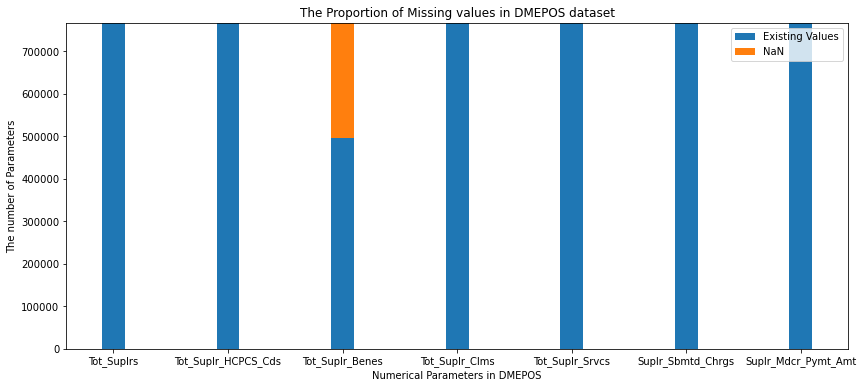

In [20]:
#Make a graph comparing the number of NaNs and the number of non-NaNs
x_variables_DMEPOS = ('Tot_Suplrs','Tot_Suplr_HCPCS_Cds','Tot_Suplr_Benes','Tot_Suplr_Clms','Tot_Suplr_Srvcs','Suplr_Sbmtd_Chrgs','Suplr_Mdcr_Pymt_Amt')
x = x_variables_DMEPOS
y1 = DMEPOS_notNaN_number
y2 = DMEPOS_NaN_Number
plt.figure(figsize=(14,6))
plt.bar(x, y1, width = 0.2)
plt.bar(x, y2, width = 0.2, bottom = y1)
plt.title('The Proportion of Missing values in DMEPOS dataset')
plt.xlabel('Numerical Parameters in DMEPOS')
plt.ylabel('The number of Parameters')
plt.legend(['Existing Values','NaN'])

#the code used to save the plot
plt.savefig('pictures/DMEPOS.jpg')

In [26]:
#count the number of NaN in every numerical columns
Part_B_NaN_Number = []
Part_B_NaN_Number.append(Part_B_concat['Tot_HCPCS_Cds'].isna().sum())
Part_B_NaN_Number.append(Part_B_concat['Tot_Benes_PartB'].isna().sum())
Part_B_NaN_Number.append(Part_B_concat['Tot_Srvcs'].isna().sum())
Part_B_NaN_Number.append(Part_B_concat['Tot_Sbmtd_Chrg'].isna().sum())
Part_B_NaN_Number.append(Part_B_concat['Tot_Mdcr_Pymt_Amt'].isna().sum())
Part_B_NaN_Number.append(Part_B_concat['Bene_Avg_Risk_Scre'].isna().sum())

Part_B_NaN_Number

[0, 0, 0, 0, 0, 0]

In [31]:
Part_B_notNaN_Number = [2210149, 2210149,2210149,2210149,2210149, 2210149]
Part_B_notNaN_Number

[2210149, 2210149, 2210149, 2210149, 2210149, 2210149]

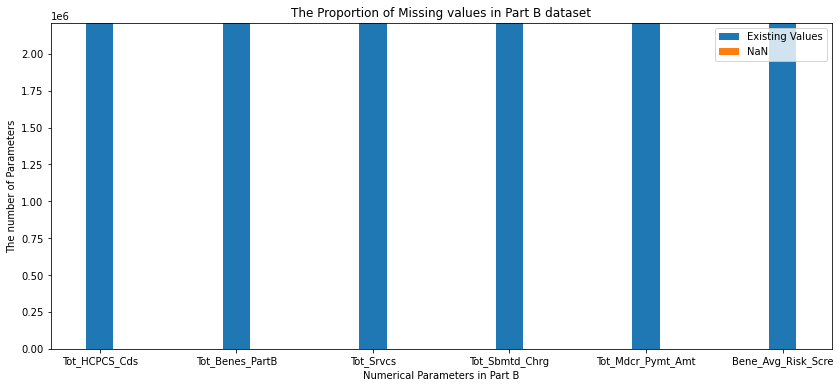

In [33]:
#Make a graph comparing the number of NaNs and the number of non-NaNs in Part B
x_variables_Part_B = ('Tot_HCPCS_Cds','Tot_Benes_PartB','Tot_Srvcs','Tot_Sbmtd_Chrg','Tot_Mdcr_Pymt_Amt', 'Bene_Avg_Risk_Scre')
x = x_variables_Part_B
y1 = Part_B_notNaN_Number
y2 = Part_B_NaN_Number
plt.figure(figsize=(14,6))
plt.bar(x, y1, width = 0.2)
plt.bar(x, y2, width = 0.2, bottom = y1)
plt.title('The Proportion of Missing values in Part B dataset')
plt.xlabel('Numerical Parameters in Part B')
plt.ylabel('The number of Parameters')
plt.legend(['Existing Values','NaN'])

#the code used to save the plot
plt.savefig('pictures/Part_B.jpg')

In [21]:
#count the number of NaN in every numerical columns
Part_D_NaN_Number = []
Part_D_NaN_Number.append(Part_D_concat['Tot_Clms'].isna().sum())
Part_D_NaN_Number.append(Part_D_concat['Tot_30day_Fills'].isna().sum())
Part_D_NaN_Number.append(Part_D_concat['Tot_Day_Suply'].isna().sum())
Part_D_NaN_Number.append(Part_D_concat['Tot_Drug_Cst'].isna().sum())
Part_D_NaN_Number.append(Part_D_concat['Tot_Benes_PartD'].isna().sum())

Part_D_NaN_Number

[0, 0, 0, 0, 265409]

In [22]:
Part_D_notNaN_number = [2367833, 2367833,2367833, 2367833,(2367833-265409) ]
Part_D_notNaN_number

[2367833, 2367833, 2367833, 2367833, 2102424]

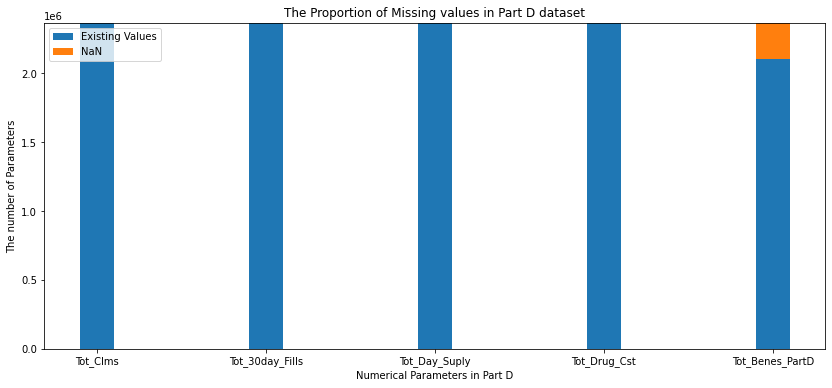

In [25]:
#Make a graph comparing the number of NaNs and the number of non-NaNs in Part D
x_variables_Part_D = ('Tot_Clms','Tot_30day_Fills','Tot_Day_Suply','Tot_Drug_Cst','Tot_Benes_PartD')
x = x_variables_Part_D
y1 = Part_D_notNaN_number
y2 = Part_D_NaN_Number
plt.figure(figsize=(14,6))
plt.bar(x, y1, width = 0.2)
plt.bar(x, y2, width = 0.2, bottom = y1)
plt.title('The Proportion of Missing values in Part D dataset')
plt.xlabel('Numerical Parameters in Part D')
plt.ylabel('The number of Parameters')
plt.legend(['Existing Values','NaN'])

#the code used to save the plot
plt.savefig('pictures/Part_D.jpg')